#**CS6140 - Machine Learning, Spring 2024**
##**Homework 1**

Submission Instructions:
- Please complete this homework assignment in the same notebook provided.
- Submit your completed assignment on Canvas by the deadline.

Submission Deadline:
**Feb 9th, 2024**

<p align="justify">
Please read the instructions carefully when answering questions and ensure your code works correctly before submission. The grader will run your code for grading the coding questions.
</p>

This homework has two parts:
1. In the first part, you are required to implement a linear regression to produce the pre-generated outputs.  
2. In the second part, you need to implemet a logistic model to complete the analysis.

In [1]:
# #@markdown ### Enter your first and last names below:
# First Name = "Vijay" #@param {type:"string"}
# Last Name = "Venkatesan" #@param {type:"string"}

#**Least Squares Regression in Python**  

Python performs linear regression using `LinearRegression()` on `(X, y)` data, detailed in its documentation. It also computes the coefficient of determination by squaring r_regression() output, requiring y reshaping with numpy's `ravel()`. The parameters for `r_regression()` can be found in the [r_regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html).  

Python also performs multiple regression with `LinearRegression()` on `(X, y)` where X contains input values. For polynomial regression, it employs `PolynomialFeatures()` to create a feature array. Parameters for `PolynomialFeatures()` are in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

#**Logistic Regression in Python**


Python performs logistic regression using `LogisticRegression()` on `(X, y)` data, where y is binary. Parameters and methods are in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). If categorical data isn't *one-hot encoded*, pandas DataFrame operations can reassign labels to 0 or 1.

#**Part one: Energy Consumption**  

The US Energy Information Administration notes that around half of US home energy goes to heating and cooling. Demand is seasonal, matching weather. Many US homes use natural gas for heating, which is also seasonally priced. The gas usage dataset provides natural gas, solar energy, and temperature data for midwestern US homeowners considering energy source installations like solar panels.

**Imports GasUsage_complete.csv data from this [repo](https://github.com/mh2t/CS6140/tree/main/data), then complete the following parts.**  

In [2]:
# Import packages and dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

GasUsage = pd.read_csv('../data/GasUsage_complete.csv')

GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,"Tuesday, July 12, 2022",0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,"Monday, July 11, 2022",0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,"Sunday, July 10, 2022",0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,"Saturday, July 9, 2022",0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,"Friday, July 8, 2022",0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,"Sunday, February 14, 2021",5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,"Saturday, February 13, 2021",4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,"Friday, February 12, 2021",6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,"Thursday, February 11, 2021",6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


In [3]:
# Convert date feature to YYYY-MM-DD

# YOUR CODE GOES HERE

GasUsage["Date"] = pd.to_datetime(GasUsage["Date"])
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,2022-07-12,0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,2022-07-11,0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,2022-07-10,0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,2022-07-09,0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,2022-07-08,0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


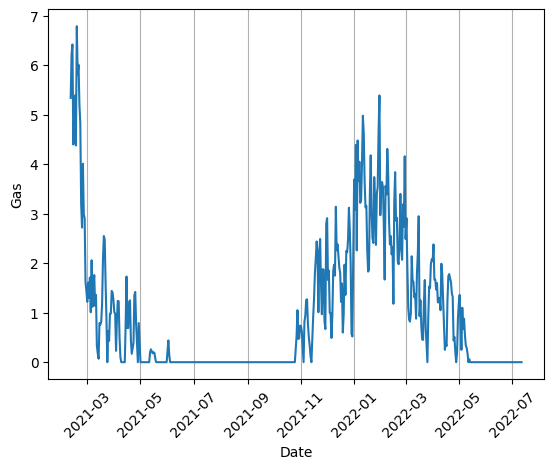

In [4]:
# Time plot of gas usage by date

# YOUR CODE GOES HERE

x = GasUsage['Date']
y = GasUsage['Gas']

plt.plot(x, y)
plt.grid(axis = 'x')

plt.xlabel("Date")
plt.ylabel("Gas")

plt.xticks(rotation=45)

plt.show()


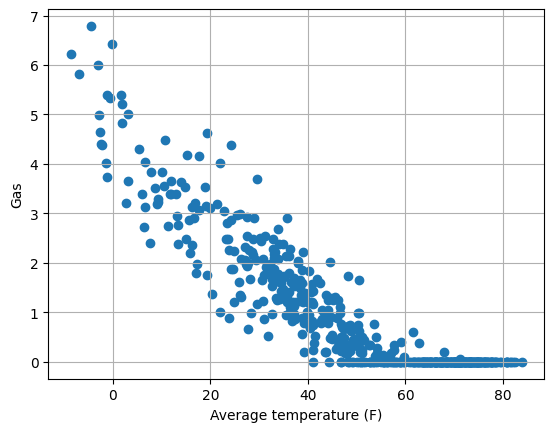

In [5]:
# Scatterplot of gas usage by temperature

# YOUR CODE GOES HERE

x = GasUsage['Average']
y = GasUsage['Gas']

plt.xlabel("Average temperature (F)")
plt.ylabel("Gas")

plt.scatter(x, y)
plt.grid()

plt.show()

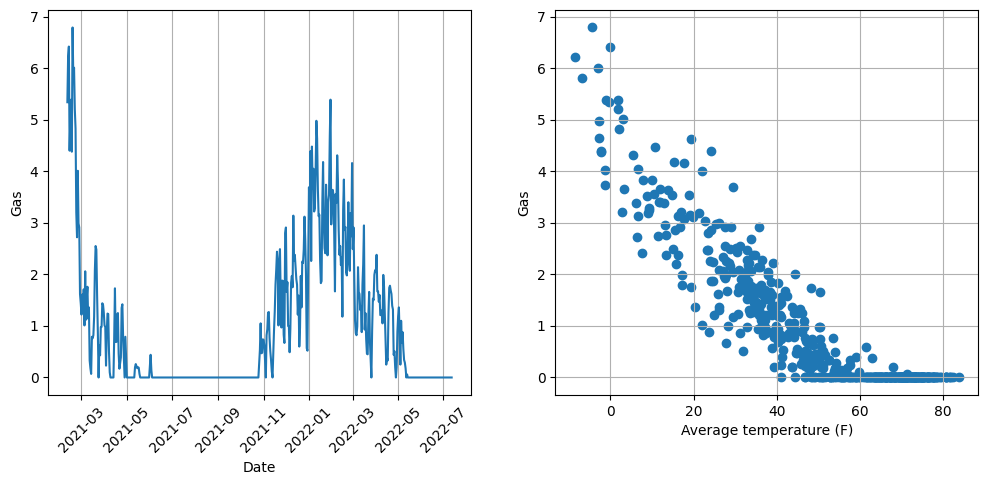

In [6]:
# Combine plots in a single plotting window
# plt.subplot(rows, columns, plot index)

plt.rcParams["figure.figsize"] = (12, 5)

plt.subplot(1, 2, 1)

# YOUR CODE GOES HERE

x = GasUsage['Date']
y = GasUsage['Gas']

plt.xlabel('Date')
plt.ylabel('Gas')

plt.xticks(rotation = 45)

plt.plot(x, y)
plt.grid(axis = 'x')

plt.subplot(1, 2, 2)

# YOUR CODE GOES HERE

x = GasUsage['Average']
y = GasUsage['Gas']

plt.xlabel("Average temperature (F)")
plt.ylabel("Gas")

plt.scatter(x, y)

plt.grid()

**Modeling Natural Gas Use Based on Temperature**  

Natural gas use and temperature correlate negatively. Due to linearity, a linear regression could model and predict gas use. After excluding gas-free days, a linear regression model is fitted.  


Fit a linear regression model and generate the outputs below.


In [7]:
# Remove days with no gas usage

# YOUR CODE GOES HERE

mask = GasUsage['Gas'] == 0.00

GasUsage = GasUsage[~mask]

GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
60,2022-05-13,0.06,58,71.29,85,14.485,0.0,7.0,1.0,6.732,1.08,0
62,2022-05-11,0.18,42,57.00,68,15.403,0.0,0.0,1.0,9.819,2.81,0
63,2022-05-10,0.29,48,54.15,63,6.826,0.0,7.0,1.0,9.191,1.12,0
64,2022-05-09,0.34,48,52.52,59,5.778,0.0,7.0,1.0,7.993,1.31,0
65,2022-05-08,0.55,35,44.97,60,15.215,0.0,7.0,1.0,9.157,1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


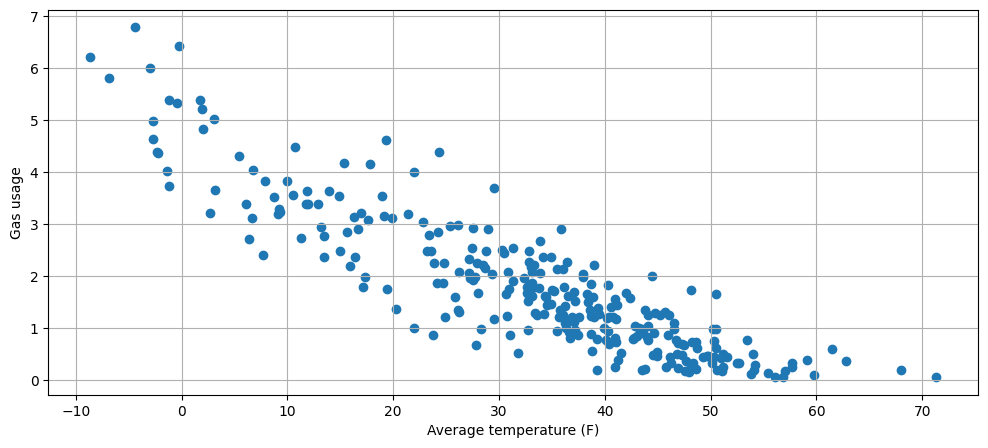

In [8]:
# Scatterplot of gas usage by temperature

# YOUR CODE GOES HERE

x = GasUsage['Average']
y = GasUsage['Gas']

# plt.xlabel("Average temperature (F)")
# plt.ylabel("Gas usage")

plt.xlabel("Average temperature (F)")
plt.ylabel("Gas usage")

plt.scatter(x, y)
plt.grid()

plt.show()

In [9]:
# Fit linear regression model

# YOUR CODE GOES HERE

X = GasUsage[['Average']]
y = GasUsage['Gas']

model = LinearRegression()

model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope is " + str(slope))
print("Intercept is " + str(intercept))



Slope is -0.07752534203705365
Intercept is 4.364743396579073


In [10]:
# Make a prediction for input 7

# YOUR CODE GOES HERE

test_data = pd.DataFrame({'Average':[7]})

prediction = model.predict(test_data)

formatted_prediction = np.array(prediction).reshape(1, -1)

print(repr(formatted_prediction))


array([[3.822066]])


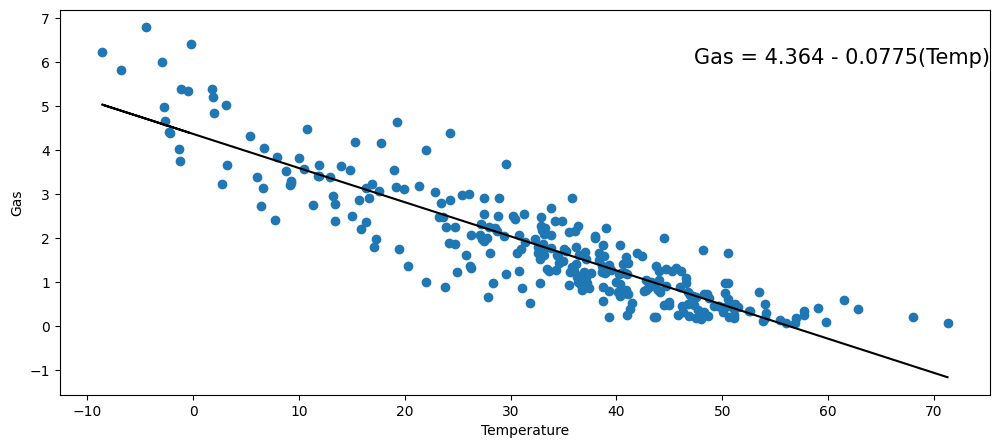

In [11]:
# Scatterplot of gas usage by temperature, with regression line and equation

# YOUR CODE GOES HERE

plt.figure()
ax = plt.axes()

x = GasUsage['Average']
y = GasUsage['Gas']

plt.xlabel("Temperature")
plt.ylabel("Gas")

m, b = np.polyfit(x, y, deg=1)

plt.scatter(x, y)
plt.plot(x, m*x + b, color="black")

plt.text(1, 0.90, 'Gas = 4.364 - 0.0775(Temp)', fontsize=15, verticalalignment='top', 
         horizontalalignment='right', transform=ax.transAxes)

plt.show()

**Considering Polynomial Models**  

Despite the declining trend in gas use with temperature, a linear model isn't optimal. A curve in the scatter plot suggests a polynomial regression might be better.  


Fit the polynomial regression models and generate the outputs below.

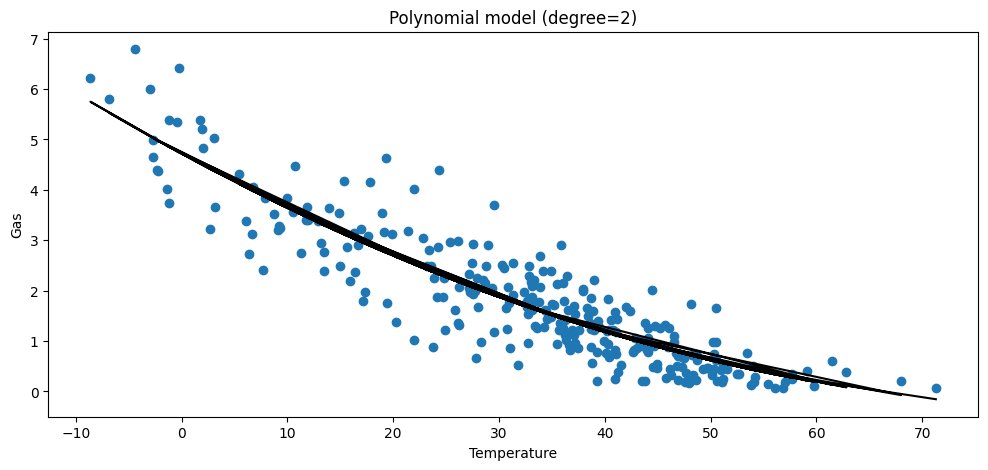

In [12]:
# Scatterplot of gas usage by temperature with degree 2 polynomial model

# YOUR CODE GOES HERE

x = GasUsage['Average'].to_numpy()
y = GasUsage['Gas']

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="black")

plt.xlabel("Temperature")
plt.ylabel("Gas")

plt.title("Polynomial model (degree=2)")

plt.show()


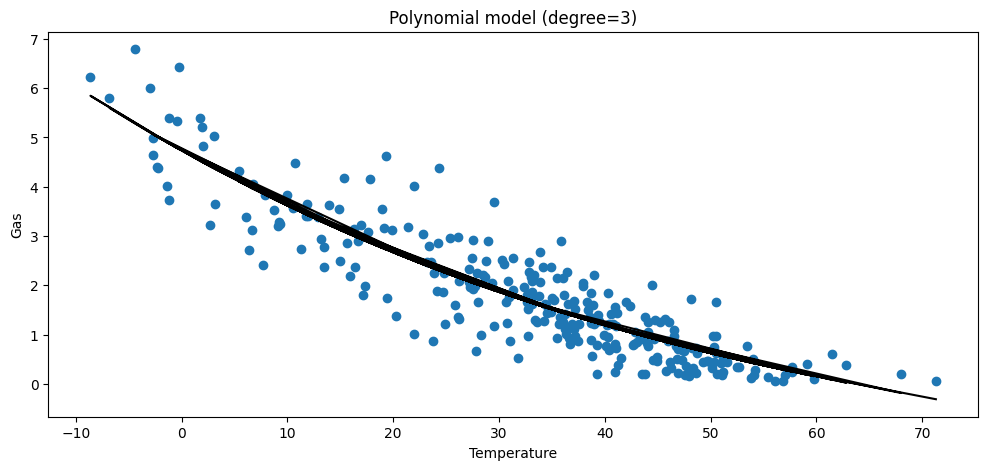

In [13]:
# Scatterplot of gas usage by temperature with degree 3 polynomial model

# YOUR CODE GOES HERE

x = GasUsage['Average'].to_numpy()
y = GasUsage['Gas']

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="black")

plt.xlabel("Temperature")
plt.ylabel("Gas")

plt.title("Polynomial model (degree=3)")

plt.show()


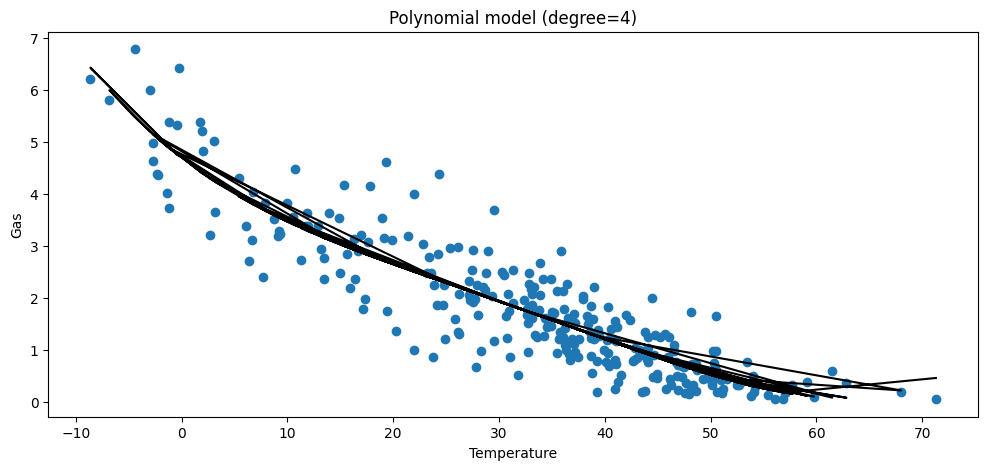

In [14]:
# Scatterplot of gas usage by temperature with degree 4 model

# YOUR CODE GOES HERE

x = GasUsage['Average'].to_numpy()
y = GasUsage['Gas']

poly = PolynomialFeatures(degree=4, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="black")

plt.xlabel("Temperature")
plt.ylabel("Gas")

plt.title("Polynomial model (degree=4)")

plt.show()


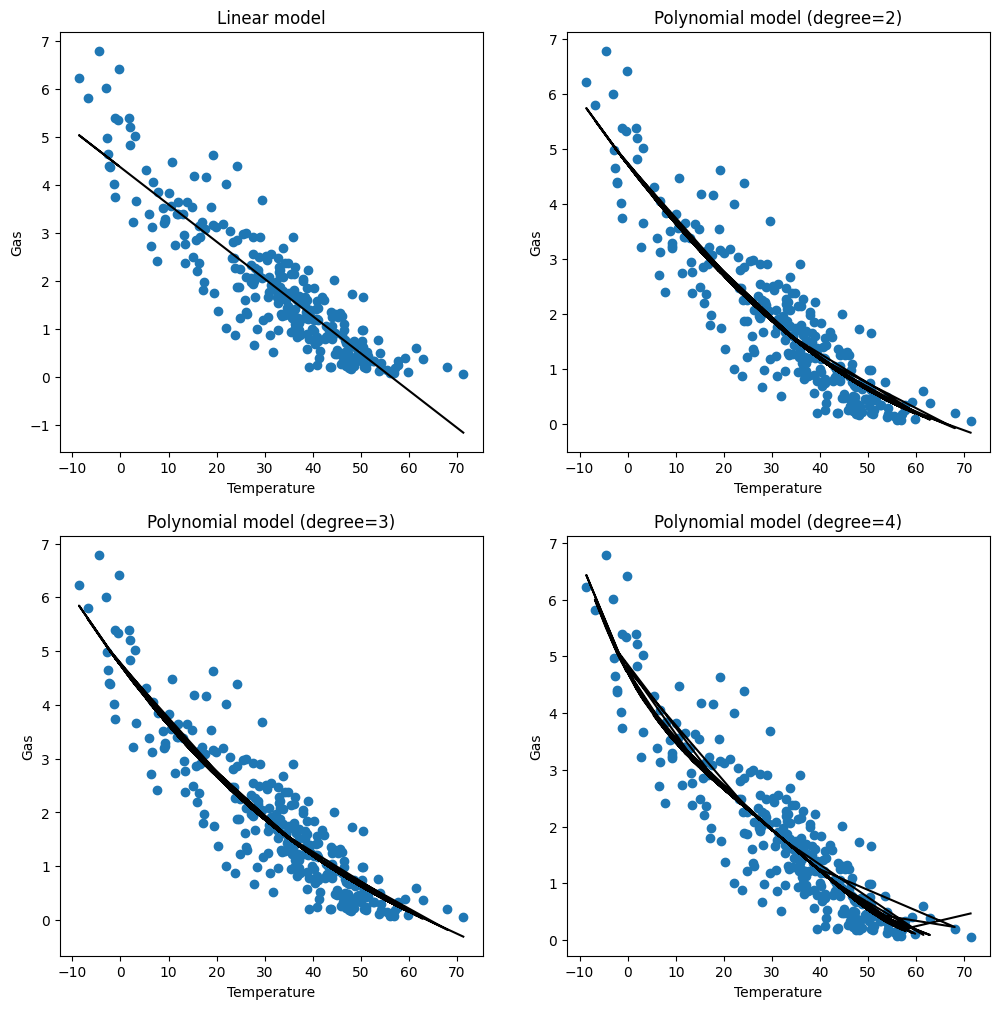

In [15]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (12, 12)

plt.subplot(2, 2, 1)
# YOUR CODE GOES HERE

x = GasUsage['Average']
y = GasUsage['Gas']

plt.scatter(x, y)

m, b = np.polyfit(x, y, deg=1)

plt.plot(x, m*x + b, color="black")

plt.xlabel("Temperature")
plt.ylabel("Gas")

plt.title("Linear model")

plt.subplot(2, 2, 2)
# YOUR CODE GOES HERE

x = GasUsage['Average'].to_numpy()
y = GasUsage['Gas']

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="black")

plt.xlabel("Temperature")
plt.ylabel("Gas")

plt.title("Polynomial model (degree=2)")

plt.subplot(2, 2, 3)
# YOUR CODE GOES HERE

x = GasUsage['Average'].to_numpy()
y = GasUsage['Gas']

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="black")

plt.xlabel("Temperature")
plt.ylabel("Gas")

plt.title("Polynomial model (degree=3)")

plt.subplot(2, 2, 4)
# YOUR CODE GOES HERE

x = GasUsage['Average'].to_numpy()
y = GasUsage['Gas']

poly = PolynomialFeatures(degree=4, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="black")

plt.xlabel("Temperature")
plt.ylabel("Gas")

plt.title("Polynomial model (degree=4)")

plt.show()

#**Part two: Customer Churn**

Companies focus on enlarging and retaining a loyal customer base to reduce advertising costs and boost revenue, making customer churn an essential satisfaction metric. For instance, content Internet service customers are less likely to switch, while unhappy ones might. Among such companies, banks are especially concerned about customer churn and a European bank examined data from 10,000 customers, including demographics, credit scores, and bank balance, to analyze factors influencing customer turnover and account closures.  

**Import the customer churn dataset from this [repo](https://github.com/mh2t/CS6140/tree/main/data), and complete the following parts.**  

In [1]:
# Import and view the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

customer_churn = pd.read_csv('../data/customer_churn.csv')
customer_churn.groupby(by='churn').size()

churn
0    7963
1    2037
dtype: int64

<Axes: xlabel='Customer churn', ylabel='Count'>

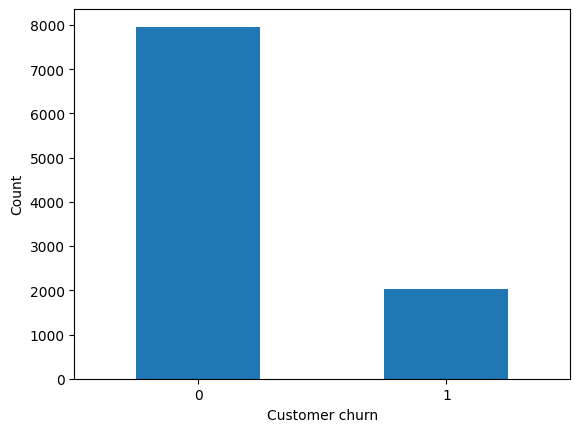

In [2]:
# Visualize the impact on customer churn by other features

# YOUR CODE GOES HERE

customer_churn['churn'].value_counts().plot(kind='bar', xlabel='Customer churn', 
                                            ylabel='Count', rot=0)


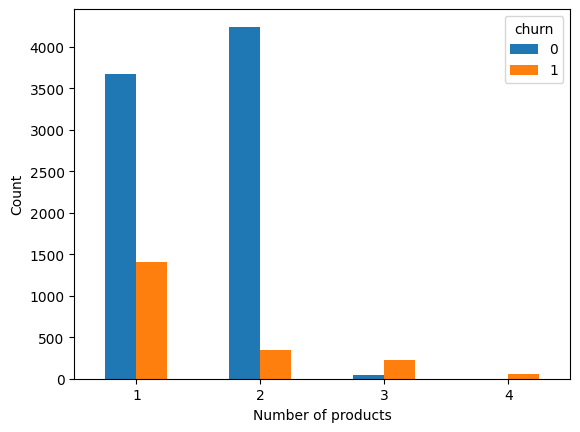

In [3]:
# YOUR CODE GOES HERE

data = customer_churn.groupby('products_number')['churn'].value_counts()

df_unstacked = data.unstack()

df_unstacked.plot(kind='bar')

plt.xlabel('Number of products')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


**Modeling Customer Churn with Logistic Regression**  

With some inevitable customer churn, the bank wants to identify predictive features. For instance, a customer moving might close an account due to location constraints. Logistic regression, not simple linear regression, suits the binary categorical churn feature. It predicts account closure likelihood, aiding an early warning system based on high-churn chance features.  

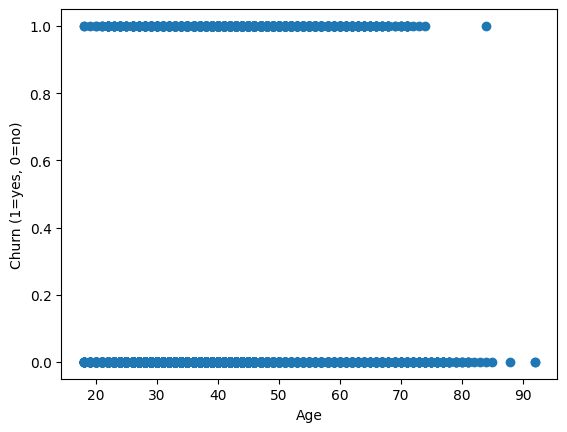

In [4]:
# Fits a logistic regression model with age as input and generate the following plot.

# YOUR CODE GOES HERE

plt.scatter(customer_churn['age'], customer_churn['churn'])

plt.xlabel('Age')
plt.ylabel('Churn (1=yes, 0=no)')

plt.show()


In [5]:
# Fit the logisitc regression model and print coefficients

# YOUR CODE GOES HERE

clf = LogisticRegression(random_state=0)

X_train = customer_churn['age'].to_numpy().reshape(-1, 1)
y_train = customer_churn['churn']

clf.fit(X_train, y_train)

slope = clf.coef_
intercept = clf.intercept_

print("Slope coefficient: " + str(slope))
print("Intercept coefficient: " + str(intercept))


Slope coefficient: [[0.06294475]]
Intercept coefficient: [-3.92860441]


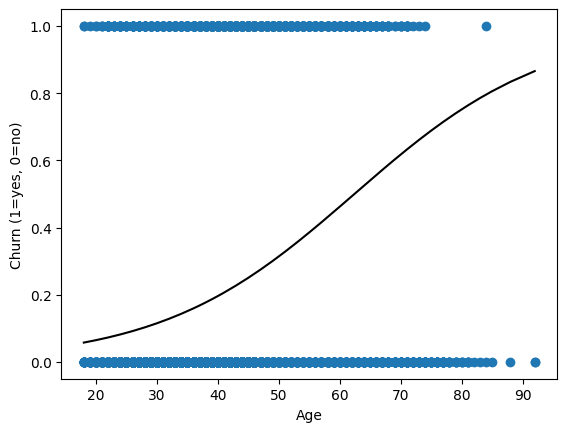

In [6]:
# Plot fitted logistic regression model

# YOUR CODE GOES HERE

x = customer_churn['age'].to_numpy()
y_predicted = clf.predict_proba(x.reshape(-1, 1))[:, 1]

sorted_indices = np.argsort(x)

x_sorted = x[sorted_indices]
y_predicted_sorted = y_predicted[sorted_indices]

plt.plot(x_sorted, y_predicted_sorted, color="black")

age = customer_churn['age']
churn = customer_churn['churn']

plt.scatter(age, churn)

plt.xlabel("Age")
plt.ylabel("Churn (1=yes, 0=no)")

plt.show()


In [7]:
# Make a prediction for input 25

# YOUR CODE GOES HERE

prediction = clf.predict_proba(np.array([[25]]))

print(repr(prediction))

array([[0.91332971, 0.08667029]])


**Multiple Logistic Regression Model for Customer Churn**  


In [9]:
# Fit a multiple logistic regression model with account balance, age, and credit score and print coefficients.

# YOUR CODE GOES HERE

X_train = customer_churn[['balance', 'age', 'credit_score']]
# X_train.astype('int64').dtypes
y_train = customer_churn['churn']

print(X_train)
print(y_train.dtypes)

clf_multiple = LogisticRegression(random_state=0).fit(X_train, np.ravel(y_train.astype(int)))

# clf_multiple.fit(X_train.astype('int64'), y_train)
# clf_multiple.fit(X_train, np.ravel(y_train.astype(int)))

print(clf_multiple.coef_)
print(clf_multiple.intercept_)


        balance  age  credit_score
0          0.00   42           619
1      83807.86   41           608
2     159660.80   42           502
3          0.00   39           699
4     125510.82   43           850
...         ...  ...           ...
9995       0.00   39           771
9996   57369.61   35           516
9997       0.00   36           709
9998   75075.31   42           772
9999  130142.79   28           792

[10000 rows x 3 columns]
int64
[[ 5.03279842e-06  6.33785909e-02 -7.71529759e-04]]
[-3.86114781]


In [24]:
# Make a prediction for input [1000, 21, 650]

# YOUR CODE GOES HERE

#Just check this with the TA, the values of the coefficients

test_data = pd.DataFrame({'balance' : [1000], 'age' : [21], 'credit_score' : [650]})
prediction = clf_multiple.predict_proba(test_data)

print(repr(prediction))

array([[0.95376406, 0.04623594]])


Text(0, 0.5, 'Credit Score')

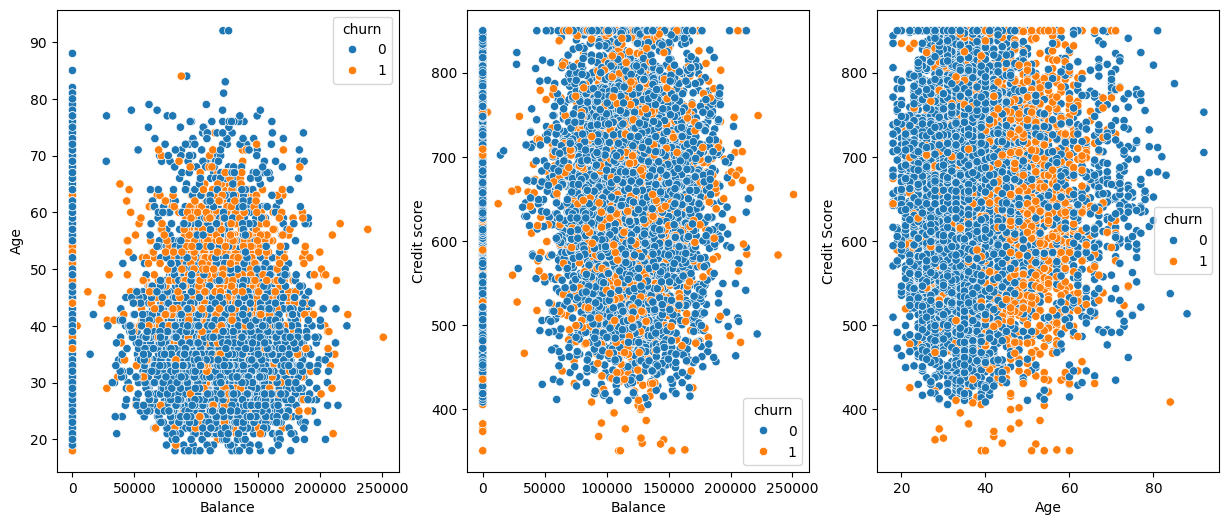

In [25]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (15, 6)

ax1 = plt.subplot(1, 3, 1)

# YOUR CODE GOES HERE

sns.scatterplot(data=customer_churn, x='balance', y='age', hue='churn')
ax1.set_xlabel('Balance')
ax1.set_ylabel('Age')

ax2 = plt.subplot(1, 3, 2)

# YOUR CODE GOES HERE

sns.scatterplot(data=customer_churn, x='balance', y='credit_score', hue='churn')
ax2.set_xlabel('Balance')
ax2.set_ylabel('Credit score')

ax3 = plt.subplot(1, 3, 3)

# YOUR CODE GOES HERE

sns.scatterplot(data=customer_churn, x='age', y='credit_score', hue='churn')
ax3.set_xlabel('Age')
ax3.set_ylabel('Credit Score')
